In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.model_selection import ParameterGrid

In [89]:
import warnings
warnings.filterwarnings('ignore')

# Importing Data and EDA

In [7]:
df=pd.read_csv(r"C:\Users\Kousik C\Downloads\Wholesale customers data.csv")

In [8]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [9]:
df.Channel.value_counts

<bound method IndexOpsMixin.value_counts of 0      2
1      2
2      2
3      1
4      2
      ..
435    1
436    1
437    2
438    1
439    1
Name: Channel, Length: 440, dtype: int64>

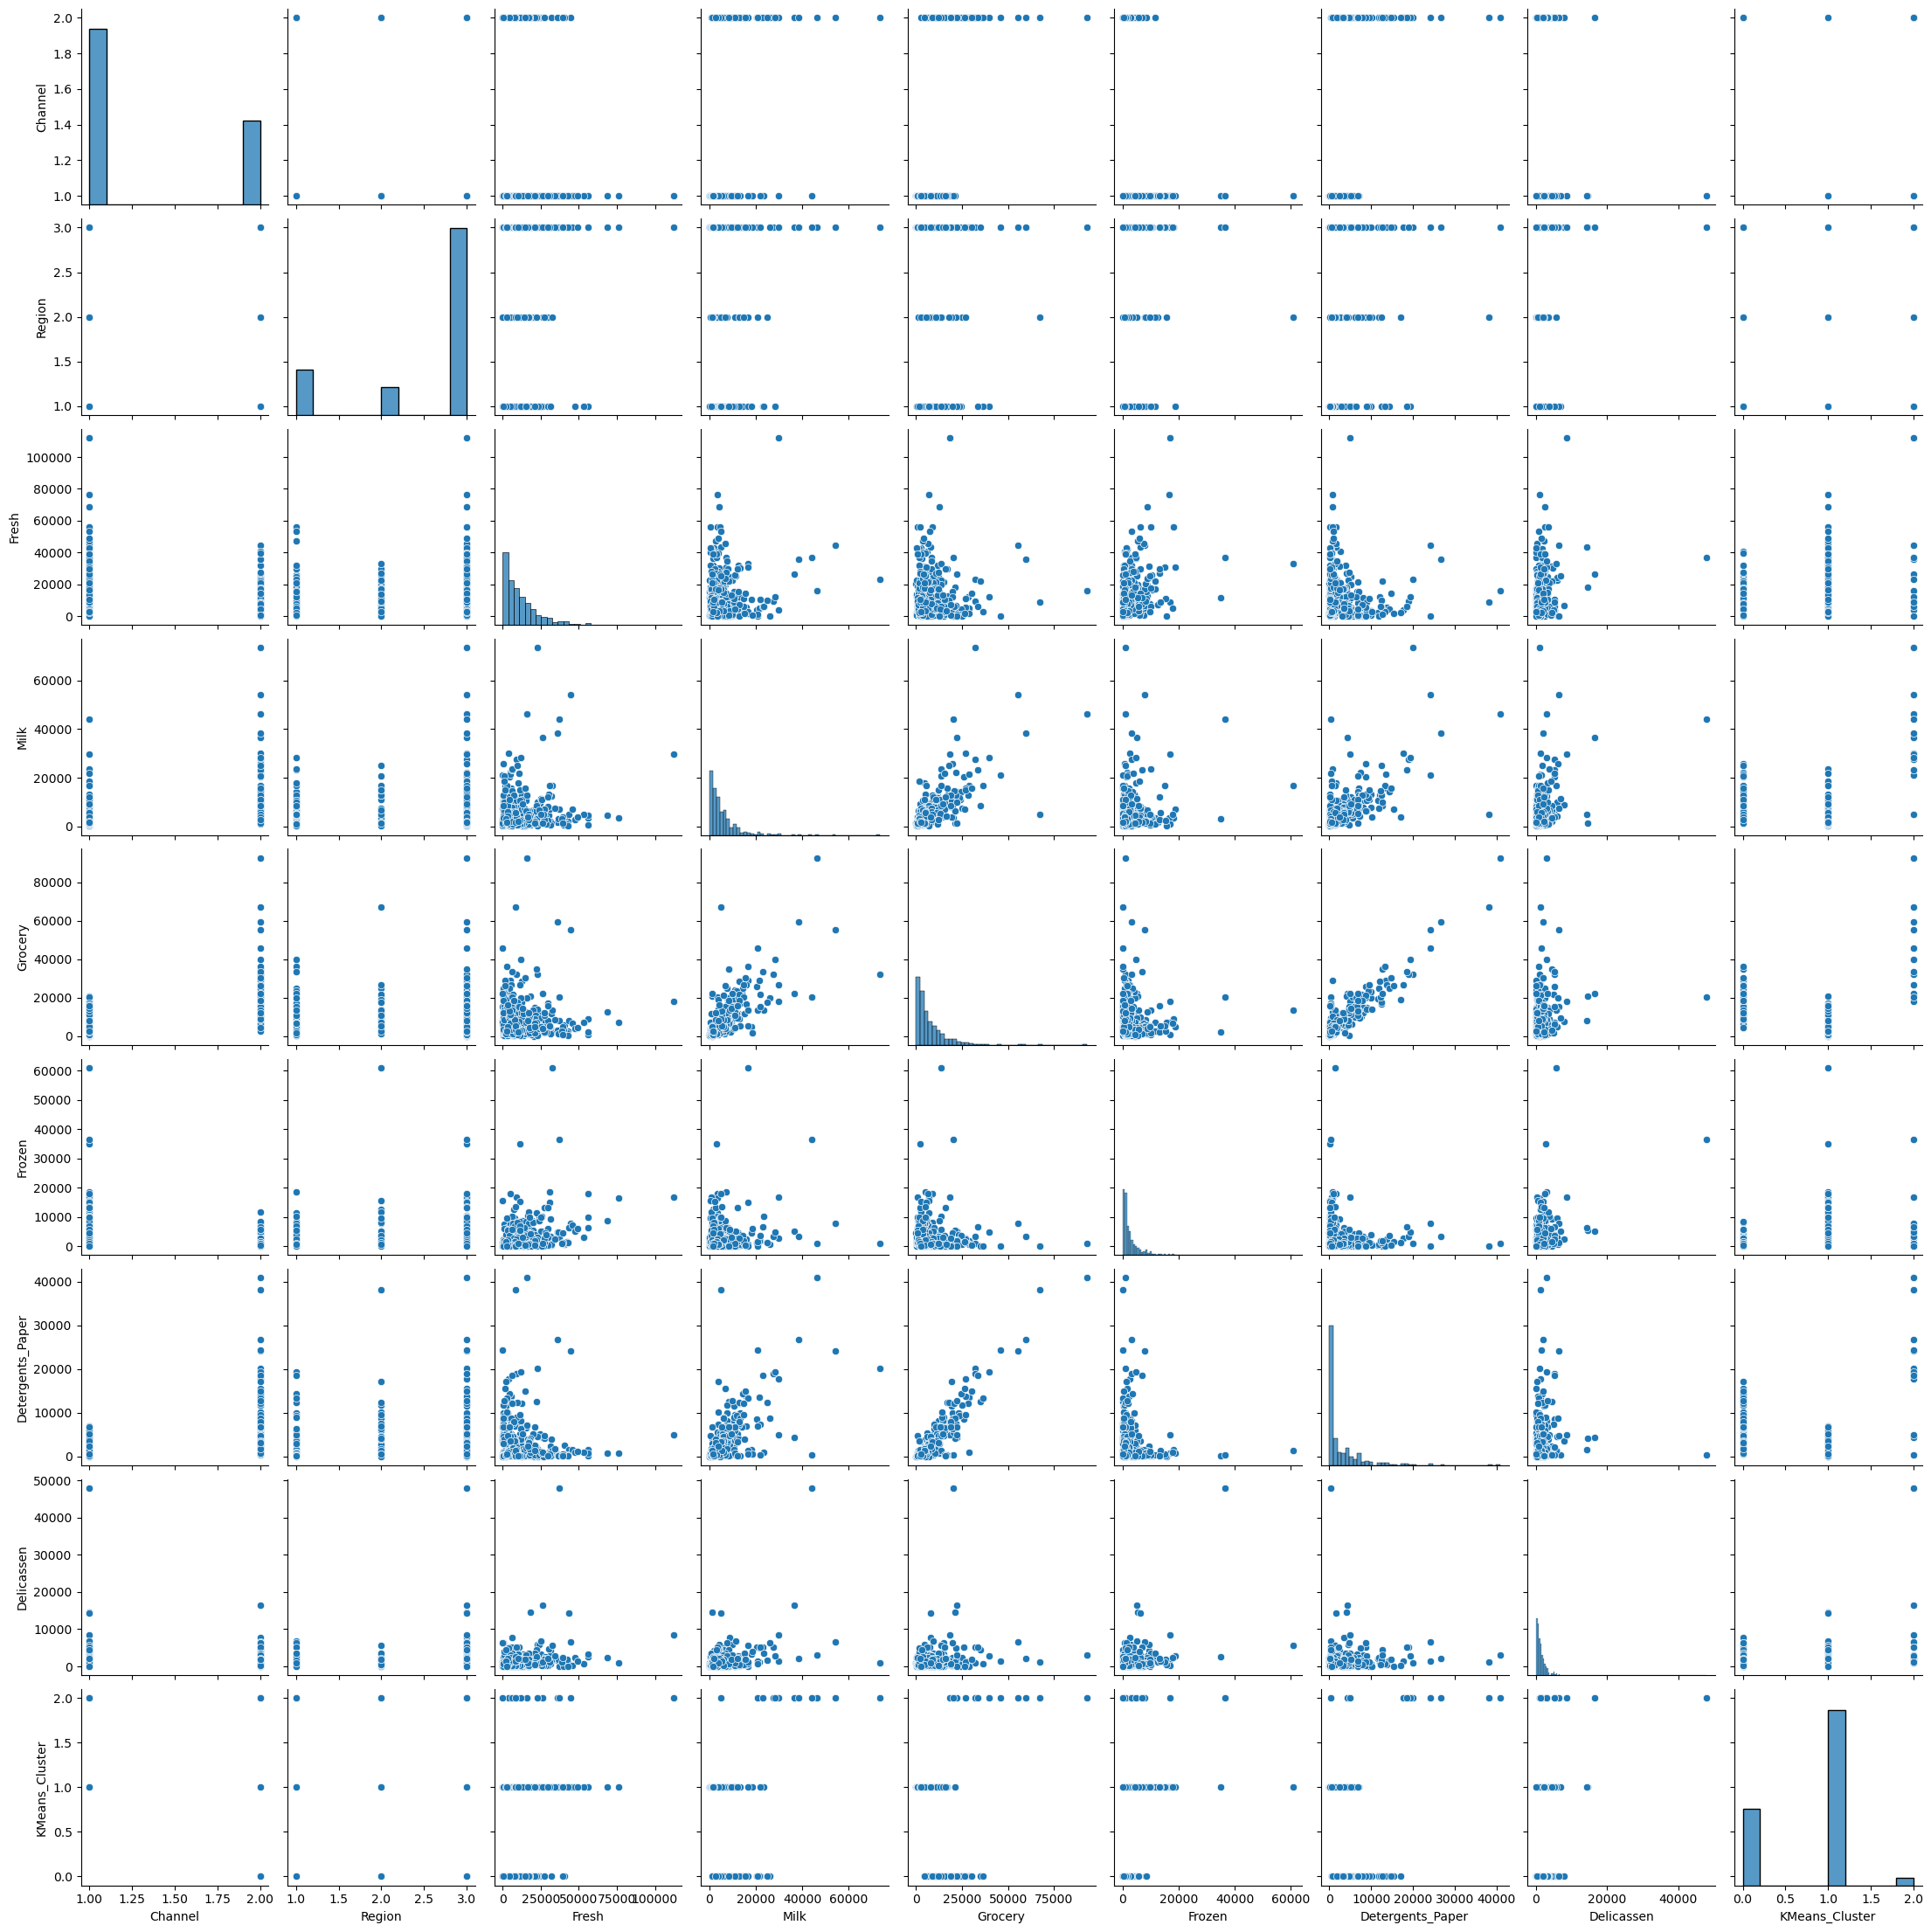

In [51]:
sns.pairplot(df)
plt.show()

# Scaling

In [43]:

scaler = StandardScaler()
features_scaled = scaler.fit_transform(df)


# KMEANS  Plotting and performance metrics

In [91]:

inertia_values = []
silhouette_scores = []
k_range = range(2, 11)  # You can adjust the range based on your preference

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features_scaled)
    
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features_scaled, kmeans.labels_))
    print(silhouette_score(features_scaled, kmeans.labels_),"is the silhouette score for cluster",k)
    print(kmeans.inertia_,"is the inertia for the cluster",k)



0.42760878610617614 is the silhouette score for cluster 2
2775.994318522356 is the inertia for the cluster 2
0.4382140755598014 is the silhouette score for cluster 3
2149.283956221759 is the inertia for the cluster 3
0.4486997890866978 is the silhouette score for cluster 4
1853.2980730865588 is the inertia for the cluster 4
0.40062616125488093 is the silhouette score for cluster 5
1560.1973005638038 is the inertia for the cluster 5
0.38639309640372077 is the silhouette score for cluster 6
1326.716555612779 is the inertia for the cluster 6
0.3957594090725536 is the silhouette score for cluster 7
1190.539118025064 is the inertia for the cluster 7
0.3634487406039287 is the silhouette score for cluster 8
1079.1331036716033 is the inertia for the cluster 8
0.36451245706069696 is the silhouette score for cluster 9
1009.314818111338 is the inertia for the cluster 9
0.36577609053161186 is the silhouette score for cluster 10
941.528425796327 is the inertia for the cluster 10


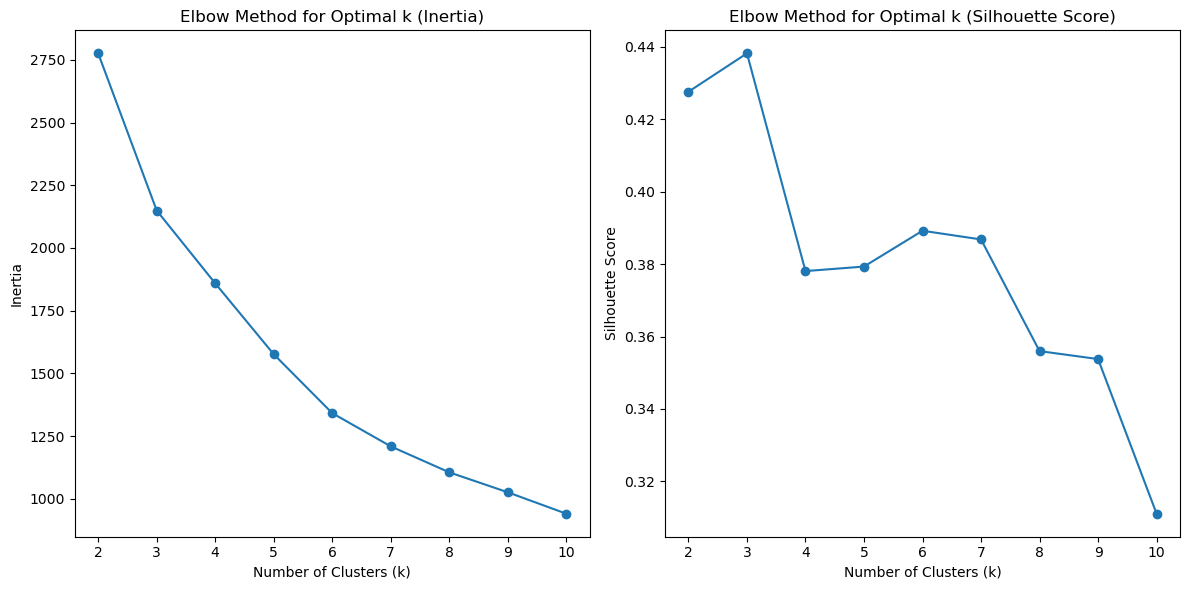

In [50]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_range, inertia_values, marker='o')
plt.title('Elbow Method for Optimal k (Inertia)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Elbow Method for Optimal k (Silhouette Score)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()

# Linkage for hierarchial clustering

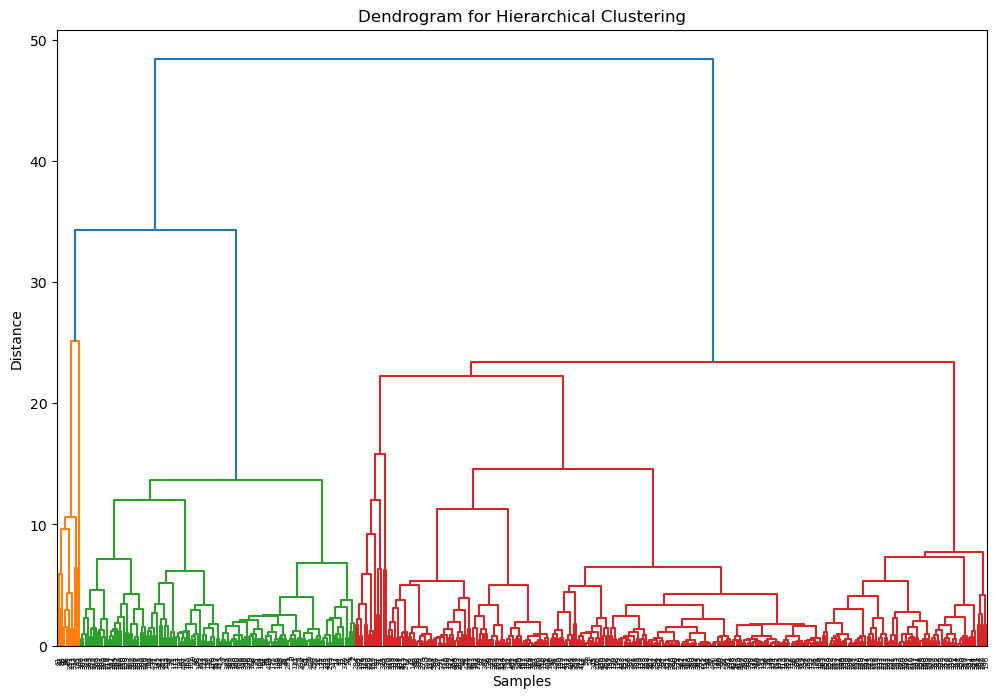

In [54]:
linked = linkage(features_scaled, method='ward')
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Agglomerative Clustering and dendogram with performance metrics

In [56]:
agg_clustering = AgglomerativeClustering(n_clusters=3)
df['Agg_Cluster'] = agg_clustering.fit_predict(features_scaled)

In [57]:
linkage_complete = linkage(features_scaled, method = 'complete', metric='euclidean')

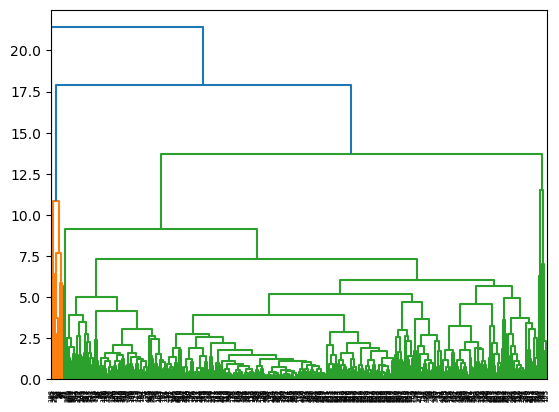

In [59]:
dendrogram(linkage_complete)
plt.show()

In [60]:
linkage_average = linkage(features_scaled, method = 'average', metric='euclidean')

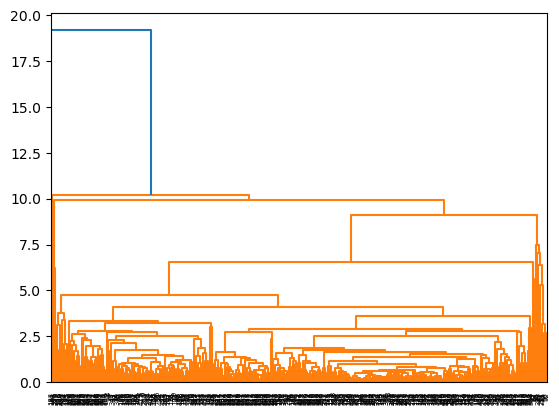

In [61]:
dendrogram(linkage_average)
plt.show()

In [62]:
silhouette_agg = silhouette_score(features_scaled, df['Agg_Cluster'])
print(f"Agglomerative Silhouette Score: {silhouette_agg}")

Agglomerative Silhouette Score: 0.43355310747971276


# DB scan with silhouette score

In [87]:
dbscan = DBSCAN(eps=3, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(features_scaled)

In [88]:
silhouette_dbscan = silhouette_score(features_scaled[df['DBSCAN_Cluster'] != -1], df['DBSCAN_Cluster'][df['DBSCAN_Cluster'] != -1])
print(f"DBSCAN Silhouette Score: {silhouette_dbscan}")

DBSCAN Silhouette Score: 0.5529197312266246
